## Laboratorio I - Femicidios - Grupo 12: Clerici, Pérez

# Laboratorio I



In [44]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

## Estadísticas oficiales de femicidio

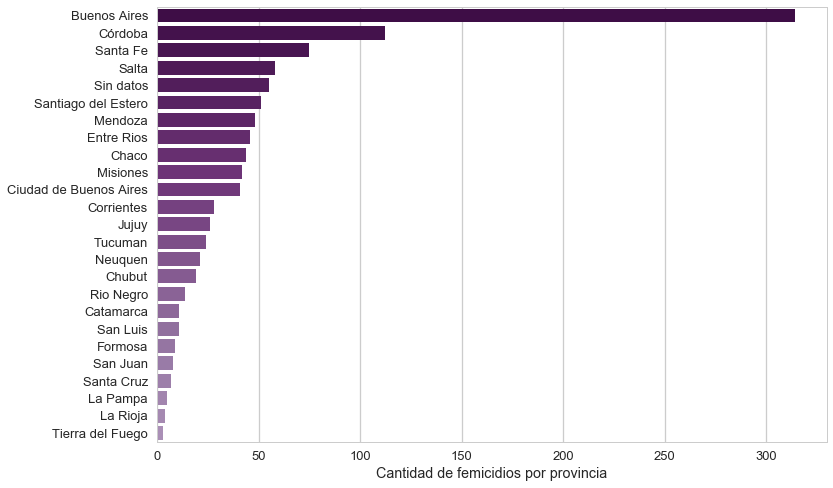

In [84]:
# Cargar dataset
fig = plt.figure(figsize=(12,8))
dataset = pd.read_csv('http://datos.jus.gob.ar/dataset/27bb9b2c-521b-406c-bdf9-98110ef73f34/resource/a2e1c899-cbaa-4bf6-b623-6648f150cab0/download/registro-de-femicidios-2018-04-13.csv', 
                      encoding='utf8')
# quitar tilde de nombre de columna número
dataset.loc[:,'numero'] = dataset[u'número']

# graficar violencia por provincia
ax = sns.countplot(data=dataset, y='lugar_hecho', 
                   palette=sns.color_palette("PRGn", 100), 
                   order=dataset['lugar_hecho'].value_counts().index
                  )
ax.set_ylabel('')
ax.set_xlabel('Cantidad de femicidios por provincia')
plt.show()

Buscamos los datos del Censo 2010 porque nos interesa pesar la cantidad de femicidios por cantidad de habitantes.
Los datos son obtenidos de https://www.sig.indec.gov.ar/censo2010/ y se encuentran en el archivo `numero-habitantes-provincia-censo2010.txt`.

In [180]:
censo2010 = pd.read_csv('numero-habitantes-provincia-censo2010.txt')
censo2010

,provincia,densidad_poblacional_hab_km2,numero_habitantes
0,Ciudad de Buenos Aires,14450.8,2890151
1,Tucuman,64.3,1448188
2,Buenos Aires,50.8,15625084
3,Misiones,37.0,1101593
4,Santa Fe,24.0,3194537
5,Córdoba,20.0,3308876
6,Entre Rios,15.7,1235994
7,Jujuy,12.7,673307
8,Mendoza,11.7,1738929
9,Corrientes,11.3,992595


In [181]:
dataset['lugar_hecho'].value_counts()

Buenos Aires              314
Córdoba                   112
Santa Fe                   75
Salta                      58
Sin datos                  55
Santiago del Estero        51
Mendoza                    48
Entre Rios                 46
Chaco                      44
Misiones                   42
Ciudad de Buenos Aires     41
Corrientes                 28
Jujuy                      26
Tucuman                    24
Neuquen                    21
Chubut                     19
Rio Negro                  14
Catamarca                  11
San Luis                   11
Formosa                     9
San Juan                    8
Santa Cruz                  7
La Pampa                    5
La Rioja                    4
Tierra del Fuego            3
Name: lugar_hecho, dtype: int64

In [236]:
# femicidios por provincia
ds = dataset['lugar_hecho'].value_counts()
# habitantes por provincia
cs = pd.Series(censo2010['numero_habitantes'].get_values(), index=censo2010['provincia'])
fem_x_hab = ds.div(cs)

In [239]:
fem_x_hab = fem_x_hab.dropna().sort_values(ascending=False)

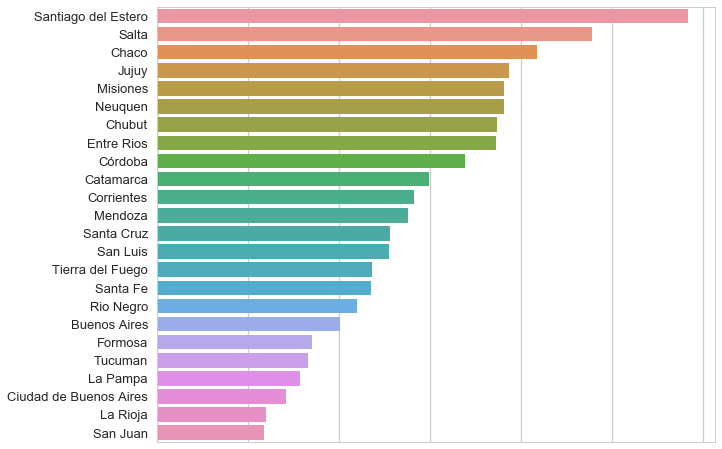

In [242]:
fig2 = plt.figure(figsize=(10,8))
ax1 = sns.barplot(x=fem_x_hab.get_values(), y=fem_x_hab.index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
plt.show()

# Datos a buscar para realizar comparaciones

* PBI por provincia
* Porcentaje de personas en situación de pobreza e indigencia
* Inversión en seguridad
* Inversión en educación
* Inversión en políticas de género e inclusión